# Fetching real time data of earthquakes

In [1]:
import requests 
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
response = requests.get(url)
data = response.json()

features = data['features']
earthquakes = pd.json_normalize(features)

In [2]:
earthquakes

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,nc75161802,0.73,"8 km WNW of Cobb, CA",1744010397750,1744010491432,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",nearby-cities,origin,phase-data,",10.0,0.009923,0.0100,87.00,md,earthquake,"M 0.7 - 8 km WNW of Cobb, CA",Point,"[-122.813331604004, 38.8330001831055, 2.210000..."
1,Feature,nn00895832,1.90,"24 km ESE of Schurz, Nevada",1744010268857,1744010406759,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",20.0,0.227000,0.1726,55.24,ml,earthquake,"M 1.9 - 24 km ESE of Schurz, Nevada",Point,"[-118.5614, 38.8535, 10.3]"
2,Feature,nc75161797,1.06,"6 km WNW of Cobb, CA",1744010010410,1744010107454,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",nearby-cities,origin,phase-data,",18.0,0.003130,0.0100,65.00,md,earthquake,"M 1.1 - 6 km WNW of Cobb, CA",Point,"[-122.791831970215, 38.8354988098145, 1.779999..."
3,Feature,nc75161792,1.28,"7 km WNW of Cobb, CA",1744009747590,1744009842688,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",nearby-cities,origin,phase-data,",23.0,0.011300,0.0300,51.00,md,earthquake,"M 1.3 - 7 km WNW of Cobb, CA",Point,"[-122.806335449219, 38.8343315124512, 1.690000..."
4,Feature,ci40918487,0.89,"8 km N of Big Bear City, CA",1744008803900,1744009089741,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",nearby-cities,origin,phase-data,scitech-link,",44.0,0.018650,0.1500,50.00,ml,earthquake,"M 0.9 - 8 km N of Big Bear City, CA",Point,"[-116.838, 34.3315, 5.39]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Feature,ci40917759,0.88,"8 km SW of Inyokern, CA",1743926435860,1743926641781,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",nearby-cities,origin,phase-data,scitech-link,",20.0,0.140900,0.1400,67.00,ml,earthquake,"M 0.9 - 8 km SW of Inyokern, CA",Point,"[-117.8808333, 35.5995, 8.63]"
228,Feature,nc75161092,0.66,"6 km WNW of Cobb, CA",1743926211770,1743927436673,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",nearby-cities,origin,phase-data,scitech-link,",9.0,0.002976,0.0100,81.00,md,earthquake,"M 0.7 - 6 km WNW of Cobb, CA",Point,"[-122.791168212891, 38.8354988098145, 1.529999..."
229,Feature,pr71478478,2.85,"11 km NNE of Carrizales, Puerto Rico",1743925631160,1743926924600,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",12.0,0.232200,0.2400,222.00,md,earthquake,"M 2.9 - 11 km NNE of Carrizales, Puerto Rico",Point,"[-66.7621666666667, 18.58, 13.53]"
230,Feature,mb90077248,0.98,"11 km N of Elliston, Montana",1743924362960,1743949249120,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",18.0,0.099450,0.0900,63.00,ml,earthquake,"M 1.0 - 11 km N of Elliston, Montana",Point,"[-112.417166666667, 46.669, 11.13]"


# Data Cleaning 

In [4]:
df = earthquakes[['properties.place','properties.mag', 'properties.time', 'geometry.coordinates']].copy()
df.columns = ['Location', 'Magnitude', 'Time', 'Coordinates']
df['Time'] = pd.to_datetime(df['Time'],unit = 'ms')

df[['Longitude', 'Latitude', 'Depth']] = pd.DataFrame(df['Coordinates'].tolist(), index = df.index)
df.drop(columns = 'Coordinates', inplace = True)

In [13]:
df.to_csv(r"D:\Web Scraping\Earthquake.csv", index = False)

# Top 10 Earthquakes accoeding to magnitudes

In [7]:
top_quakes = df.sort_values('Magnitude',ascending = False).head(10)
print(top_quakes[['Location','Magnitude','Time']])

                                  Location  Magnitude                    Time
40   150 km SSW of Severo-Kuril’sk, Russia        5.4 2025-04-07 02:59:30.060
191              north of Severnaya Zemlya        5.4 2025-04-06 10:36:59.572
201  195 km ESE of Kimbe, Papua New Guinea        5.2 2025-04-06 10:02:47.516
108          South Sandwich Islands region        4.9 2025-04-06 18:15:08.147
105         12 km WNW of Kalávryta, Greece        4.9 2025-04-06 18:44:14.743
172        79 km SSW of Corinto, Nicaragua        4.9 2025-04-06 11:59:06.284
135  174 km ESE of Kimbe, Papua New Guinea        4.8 2025-04-06 15:11:30.453
85   182 km ESE of Kimbe, Papua New Guinea        4.6 2025-04-06 21:14:58.810
63             118 km E of Tual, Indonesia        4.6 2025-04-07 00:18:15.288
81    58 km E of Kirakira, Solomon Islands        4.6 2025-04-06 22:00:23.825


# Visualizing the count of earthquakes happended according to magnitudes

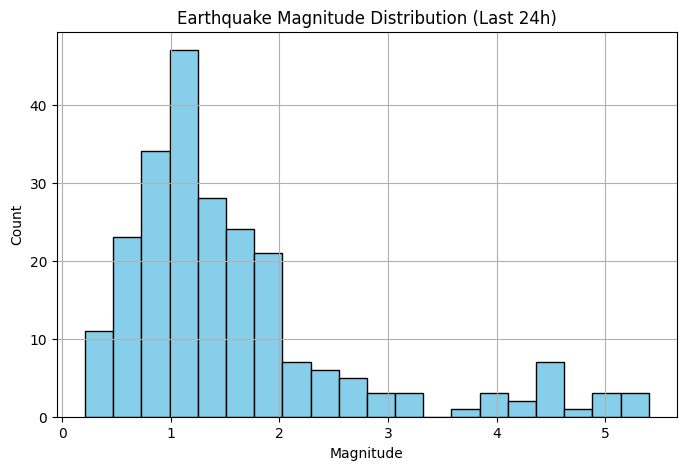

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Magnitude'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Earthquake Magnitude Distribution (Last 24h)')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [10]:
!pip install folium

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   -------------- ------------------------ 41.0/110.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 110.9/110.9 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
   ---------------------------------------- 88.4/88.4 kB ? eta 0:00:00


In [12]:
import folium

map_quakes = folium.Map(location=[0,0],zoom_start = 2)

for _, row in df.iterrows():
    folium.CircleMarker(location = [row['Latitude'], row['Longitude']], radius = row['Magnitude']*1.5, color = 'red' if row['Magnitude'] >= 5 else 'orange', fill = True, fill_opacity = 0.6, popup = f"{row['Location']}({row['Magnitude']})").add_to(map_quakes)
map_quakes.save("earthquakes_map.html")